In [1]:
import sys
sys.path.insert(0, '/home/niell_lab/Documents/github/FreelyMovingEphys/')
from utils.aux_funcs import flatten_series
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils.population import Population

In [2]:
import matplotlib.patches as patches
from matplotlib import cm

In [3]:
savepath = '/home/niell_lab/data/freely_moving_ephys/batch_files/120221_hffm/'

In [4]:
pop = Population(savepath)

In [5]:
pop.load_from_pickle(stage='population')

reading data from /home/niell_lab/data/freely_moving_ephys/batch_files/120221_hffm/pooled_ephys_population_update_120621.pickle


In [50]:
unit = pop.data.iloc[87] # 591; 281

<ErrorbarContainer object of 3 artists>

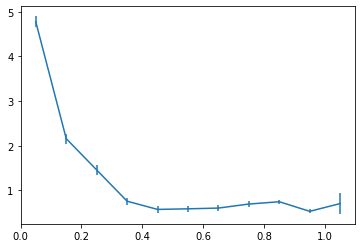

In [51]:
plt.errorbar(unit['hf1_wn_crf_cent'], unit['hf1_wn_crf_tuning'], yerr=unit['hf1_wn_crf_err'])

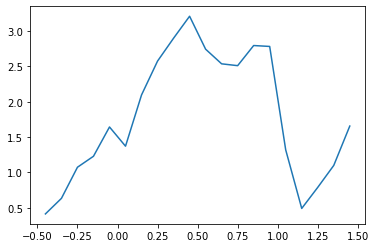

In [52]:
lower = -0.5; upper = 1.5; dt = 0.1
bins = np.arange(lower,upper+dt,dt)
psth = unit['hf3_gratings_grating_psth']
plt.plot(bins[0:-1]+ dt/2,psth)

In [47]:
unit['grat_psth_drop']

-2.2579831932773136

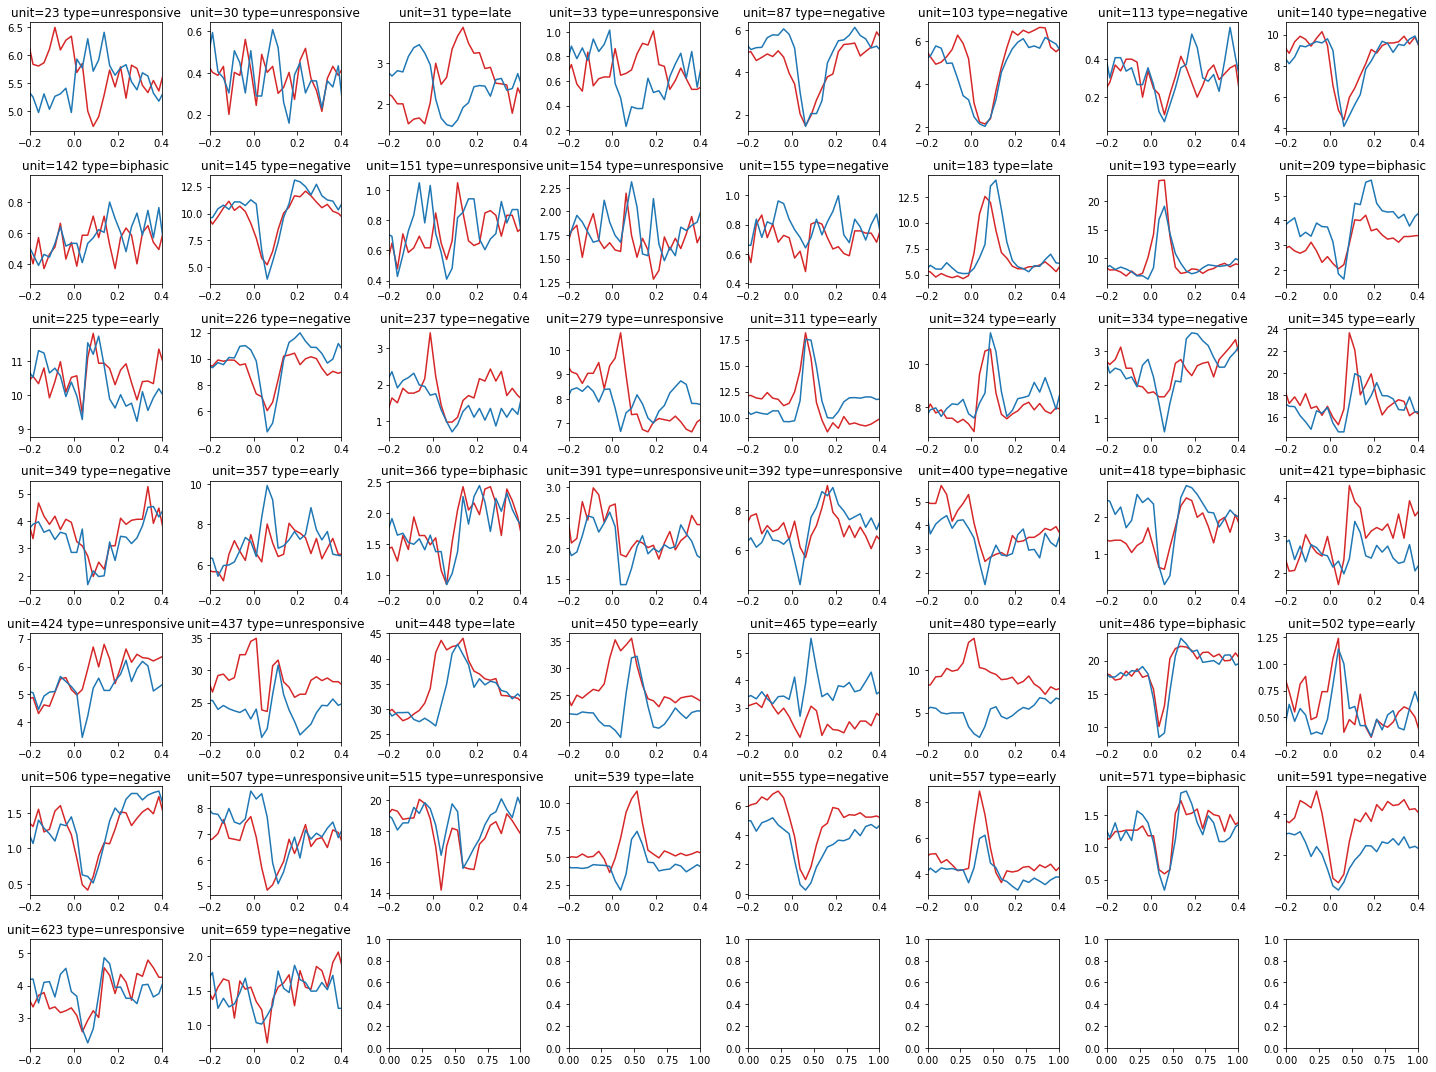

In [57]:
sbc_data = pop.data[pop.data['is_SbC']]
count = 1
plt.subplots(int(np.ceil(len(sbc_data)/8)),8,figsize=(20,15))
for ind, row in sbc_data.iterrows():
    plt.subplot(int(np.ceil(len(sbc_data)/8)),8,count)
    plt.title('unit='+str(ind)+' type='+str(row['movement_psth_type_simple']))
    leftavg = row['fm1_downsacc_avg_gaze_shift_dEye']
    rightavg = row['fm1_upsacc_avg_gaze_shift_dEye']
    plt.plot(pop.trange_x, leftavg, color='tab:red')
    plt.plot(pop.trange_x, rightavg, color='tab:blue')
    plt.xlim(-0.2,0.4)
    count += 1
for count in range(count, int(np.ceil(len(sbc_data)))):
    plt.subplot(int(np.ceil(len(sbc_data)/8)),8,count)
    plt.axis('off')
plt.tight_layout()

In [17]:
np.mean(psth)

2.249143835616439

array([False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False])

In [8]:
np.shape(unit['hf1_wn_crf_tuning'])

(11,)

In [38]:
lower = -0.5; upper = 1.5; dt = 0.1
bins = np.arange(lower,upper+dt,dt)
grat_x = bins[0:-1]+ dt/2
for ind, row in pop.data.iterrows():
    if row['hf1_wn_crf_tuning'][0]<1:
        pop.data.at[ind, 'is_SbC'] = False
        continue
    high_contrast_std = np.std(row['hf1_wn_crf_tuning'][3:])
    pop.data.at[ind, 'high_contrast_std'] = high_contrast_std
    min_contrast = row['hf1_wn_crf_tuning'][0]
    mid_contrast = row['hf1_wn_crf_tuning'][3]
    max_contrast = row['hf1_wn_crf_tuning'][-1]
    min_min_mod = (min_contrast - mid_contrast) / (min_contrast + mid_contrast)
    min_max_mod = (min_contrast - max_contrast) / (min_contrast + max_contrast)
    pop.data.at[ind, 'SbC_min_mid_mod'] = min_min_mod
    pop.data.at[ind, 'SbC_min_max_mod'] = min_max_mod
    grat_psth_mean = np.mean(row['hf3_gratings_grating_psth'])
    grat_psth_during_stim = row['hf3_gratings_grating_psth'][(grat_x<1) * (grat_x>0)]
    pop.data.at[ind, 'grat_psth_drop'] = grat_psth_mean - np.mean(grat_psth_during_stim)
    pop.data.at[ind, 'is_SbC'] = (high_contrast_std<1 and min_min_mod>0.25)

(array([  1.,   1.,   1.,   3.,   6.,  20., 130., 163.,  14.,   4.]),
 array([-25.29159664, -21.78219504, -18.27279344, -14.76339184,
        -11.25399024,  -7.74458864,  -4.23518704,  -0.72578544,
          2.78361616,   6.29301776,   9.80241935]),
 <BarContainer object of 10 artists>)

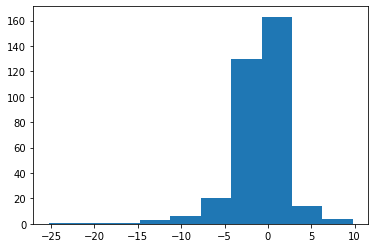

In [39]:
plt.hist(pop.data['grat_psth_drop'])

(array([ 1.,  0.,  0.,  3.,  1.,  0.,  5.,  9., 15.,  7.,  4.,  1.,  0.,
         2.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([-6.57413793, -5.75531007, -4.9364822 , -4.11765434, -3.29882647,
        -2.47999861, -1.66117075, -0.84234288, -0.02351502,  0.79531285,
         1.61414071,  2.43296858,  3.25179644,  4.0706243 ,  4.88945217,
         5.70828003,  6.5271079 ,  7.34593576,  8.16476363,  8.98359149,
         9.80241935]),
 <BarContainer object of 20 artists>)

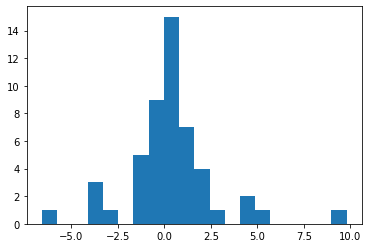

In [48]:
plt.hist(pop.data['grat_psth_drop'][pop.data['is_SbC']], bins=20)

In [49]:
pop.data['grat_psth_drop'][pop.data['is_SbC']]

23     4.172903
30     1.194194
31     1.775484
33     1.119355
87    -0.758085
103    1.375809
113    0.145690
140   -1.305172
142    0.291379
145   -3.931897
151    0.229310
154    0.582759
155    0.349138
183   -1.043966
193   -6.574138
209   -0.274138
225    0.025862
226   -3.536207
237    0.158475
279    0.268908
311   -1.366387
324   -1.120168
334   -0.787903
345    4.770161
349   -0.180645
357   -4.029032
366    0.692742
391    0.270161
392    9.802419
400    0.006452
418   -0.002568
421   -1.579623
424   -0.057363
437    2.469178
448    0.382705
450    1.426370
465   -3.236301
480    2.089897
486   -0.082192
502   -0.070205
506   -0.110649
507    0.816972
515    5.680532
539    1.283694
555    1.808652
557    0.270383
571   -0.048801
591    1.632705
623    1.057070
659    0.133731
Name: grat_psth_drop, dtype: float64

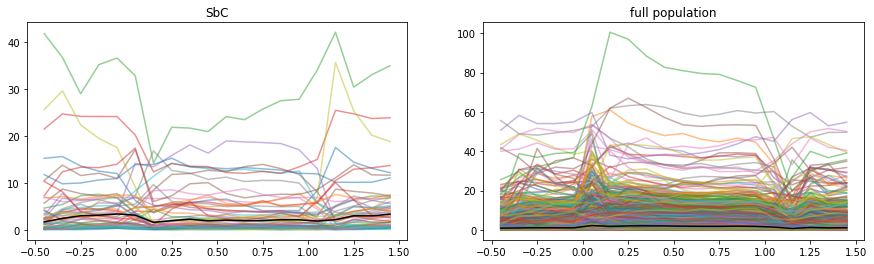

In [13]:
lower = -0.5; upper = 1.5; dt = 0.1
bins = np.arange(lower,upper+dt,dt)
grat_x = bins[0:-1]+dt/2
plt.subplots(1,2,figsize=(15,4))
plt.subplot(121)
for i, psth in pop.data['hf3_gratings_grating_psth'][pop.data['is_SbC']].iteritems():
    plt.plot(grat_x, psth, alpha=0.5)
plt.plot(grat_x, np.mean(flatten_series(pop.data['hf3_gratings_grating_psth'][pop.data['is_SbC']]),0), 'k')
plt.title('SbC')
plt.subplot(122)
for i, psth in pop.data['hf3_gratings_grating_psth'].iteritems():
    plt.plot(grat_x, psth, alpha=0.5)
plt.title('full population')
plt.plot(grat_x, np.mean(flatten_series(pop.data['hf3_gratings_grating_psth']),0), 'k')

In [99]:
len(pop.data[pop.data['is_SbC']])

50

In [100]:
len(pop.data)

665

(-1.0, 1.0)

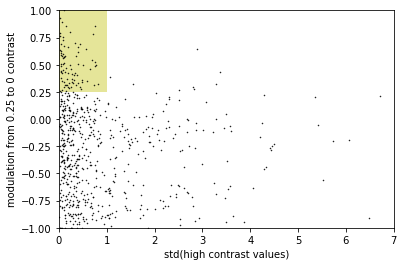

In [104]:
fig, ax = plt.subplots()
plt.plot(pop.data['high_contrast_std'], pop.data['SbC_min_mid_mod'], 'k.', markersize=1)
# for ind in possible_SbCs:
#     plt.plot(pop.data['high_contrast_std'].iloc[possible_SbCs], pop.data['SbC_min_mid_mod'].iloc[possible_SbCs], 'ro', markersize=3)
# plt.plot(unit['high_contrast_std'], unit['SbC_min_mid_mod'], 'g*', markersize=10)
plt.ylabel('modulation from 0.25 to 0 contrast')
plt.xlabel('std(high contrast values)')
rect = patches.Rectangle((0, 0.25), 1, 0.75, linewidth=1, edgecolor='none', facecolor='y', alpha=0.4)
ax.add_patch(rect)
plt.xlim([0,7])
plt.ylim([-1,1])

(0.0, 8.0)

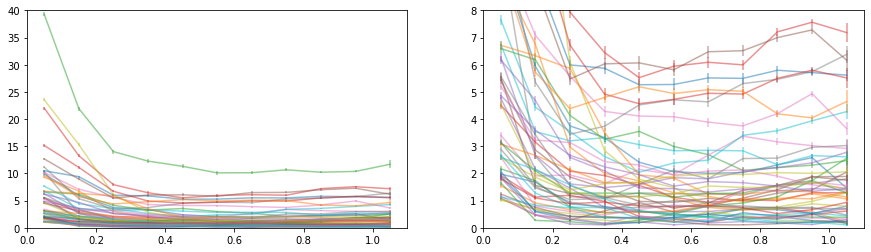

In [103]:
plt.subplots(1,2,figsize=(15,4))
plt.subplot(1,2,1)
for ind, row in pop.data[pop.data['is_SbC']].iterrows():
    plt.errorbar(row['hf1_wn_crf_cent'], row['hf1_wn_crf_tuning'], yerr=row['hf1_wn_crf_err'], alpha=0.5)
plt.ylim([0,40])
plt.subplot(1,2,2)
for ind, row in pop.data[pop.data['is_SbC']].iterrows():
    plt.errorbar(row['hf1_wn_crf_cent'], row['hf1_wn_crf_tuning'], yerr=row['hf1_wn_crf_err'], alpha=0.5)
plt.ylim([0,8])

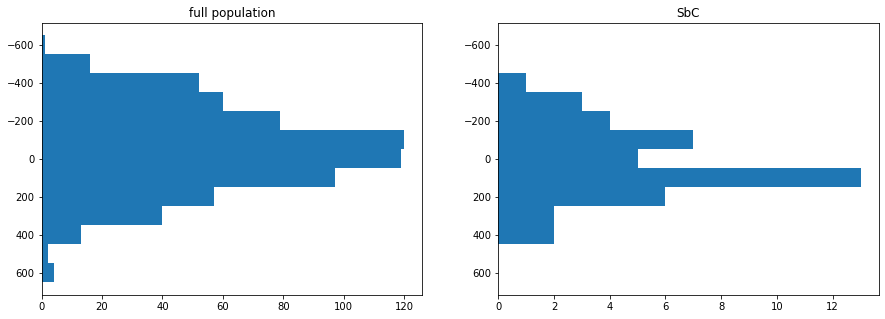

In [57]:
plt.subplots(1,2,figsize=(15,5))
plt.subplot(121)
plt.hist(pop.data['hf1_wn_depth_from_layer5'],
         bins=list(np.arange(-650,650+100,100)), orientation='horizontal')#, density=True)
plt.title('full population')
plt.gca().invert_yaxis()
plt.subplot(122)
plt.hist(pop.data['hf1_wn_depth_from_layer5'][pop.data['is_SbC']],
         bins=list(np.arange(-650,650+100,100)), orientation='horizontal')#, density=True)
plt.title('SbC')
plt.gca().invert_yaxis()

In [106]:
SbC_occ = pop.data['movement_psth_type_simple'][pop.data['is_SbC']].value_counts()
all_occ = pop.data['movement_psth_type_simple'].value_counts()

In [108]:
SbC_occ

negative        15
unresponsive    13
early           11
biphasic         7
late             4
Name: movement_psth_type_simple, dtype: int64

([<matplotlib.axis.XTick at 0x7f08a25d6d90>,
 [Text(0, 0, 'early'),
  Text(1, 0, 'late'),
  Text(2, 0, 'biphasic'),
  Text(3, 0, 'negative'),
  Text(4, 0, 'unresponsive')])

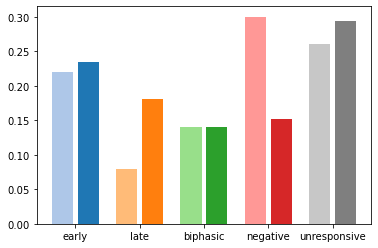

In [109]:
names = ['early','late','biphasic','negative','unresponsive']
for count, name in enumerate(names):
    if count < 4:
        base_color = count*2
    else:
        base_color = 14
    plt.bar(count-0.2, SbC_occ[name]/SbC_occ.sum(), width=0.33, color=cm.tab20(base_color+1))
    plt.bar(count+0.2, all_occ[name]/all_occ.sum(), width=0.33, color=cm.tab20(base_color))
plt.xticks(ticks=range(5), labels=names)

(-1.0, 1.0)

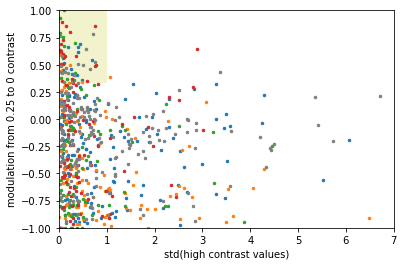

In [95]:
fig, ax = plt.subplots()
for count, name in enumerate(names):
    if count < 4:
        base_color = count*2
    else:
        base_color = 14
    for ind, row in pop.data[pop.data['movement_psth_type_simple']==name].iterrows():
        plt.plot(row['high_contrast_std'], row['SbC_min_mid_mod'], '.', markersize=5, color=cm.tab20(base_color))
plt.ylabel('modulation from 0.25 to 0 contrast')
plt.xlabel('std(high contrast values)')
rect = patches.Rectangle((0, 0.33), 1, 0.67, linewidth=1, edgecolor='none', facecolor='y', alpha=0.2)
ax.add_patch(rect)
plt.xlim([0,7])
plt.ylim([-1,1])

In [30]:
pop.data['is_SbC'].value_counts()

False    600
True      65
Name: is_SbC, dtype: int64

In [21]:
unit = pop.data.iloc[591]

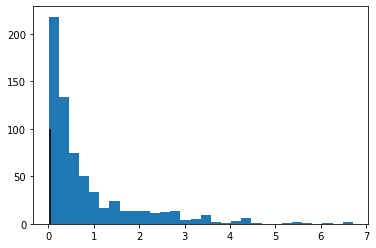

In [22]:
plt.hist(pop.data['high_contrast_std'], bins=30)
plt.vlines(unit['high_contrast_std'], 0,100, color='k')

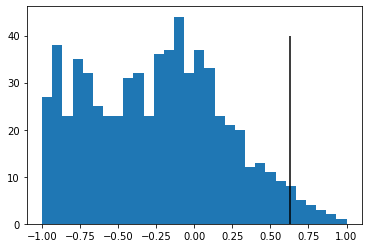

In [24]:
plt.hist(pop.data['SbC_min_mid_mod'], bins=30)
plt.vlines(unit['SbC_min_mid_mod'], 0,40, color='k')

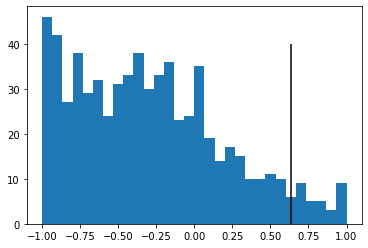

In [25]:
plt.hist(pop.data['SbC_min_max_mod'], bins=30)
plt.vlines(unit['SbC_min_max_mod'], 0,40, color='k')

In [ ]:
plt.hist(pop.data['SbC_min_max_mod'], bins=30)
plt.vlines(unit['SbC_min_max_mod'] - unit['SbC_min_mid_mod'], 0,40, color='k')

In [35]:
possible_SbCs = [24, 30, 31, 32, 33, 37, 61, 68, 69, 88, 89, 91, 93, 104, 106, 123, 124, 126, 130, 137, 141, 142, 146, 147, 152, 155, 156, 158, 161, 162, 169, 170, 180, 184, 203, 226, 238, 265, 279, 280, 282, 296, 297, 308, 323, 329, 343, 346, 350, 358, 360, 363, 367, 393, 401, 419, 422, 438, 445, 449, 451, 453, 461, 481, 490, 503, 507, 516, 531, 540, 556, 558, 572, 590, 592, 612, 624, 636, 648, 660, 661]
possible_SbCs = np.array([i-1 for i in possible_SbCs])

Text(0.5, 0, 'std(high contrast values)')

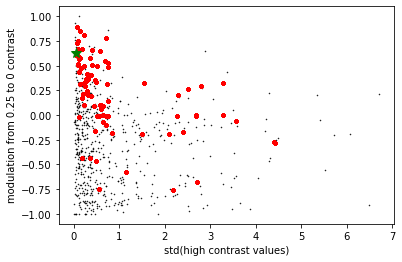

In [54]:
plt.plot(pop.data['high_contrast_std'], pop.data['SbC_min_mid_mod'], 'k.', markersize=1)
for ind in possible_SbCs:
    plt.plot(pop.data['high_contrast_std'].iloc[possible_SbCs], pop.data['SbC_min_mid_mod'].iloc[possible_SbCs], 'ro', markersize=3)
plt.plot(unit['high_contrast_std'], unit['SbC_min_mid_mod'], 'g*', markersize=10)
plt.ylabel('modulation from 0.25 to 0 contrast')
plt.xlabel('std(high contrast values)')

In [44]:
pop.data['high_contrast_std'].iloc[possible_SbCs].argmax()

40

In [45]:
possible_SbCs[40]

281